In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Импорт библиотек

In [ ]:
import numpy as np #Библиотека работы с массивами
import pandas as pd # Библиотека для работы с базами

from tensorflow.keras.models import Sequential, Model #
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten #
from tensorflow.keras import utils #Используем для to_categoricall
from tensorflow.keras.optimizers import Adam,Adadelta,SGD,Adagrad,RMSprop #
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence #
from tensorflow.keras.preprocessing.sequence import pad_sequences #
from tensorflow.keras.callbacks import LambdaCallback, LearningRateScheduler # подключаем колбэки

from sklearn.preprocessing import StandardScaler #
from sklearn.model_selection import train_test_split # Для разбивки на выборки
from sklearn.metrics import mean_squared_error, mean_absolute_error #
#from google.colab import files #Для загрузки своей картинки

import random #Для генерации случайных чисел
import math # Для округления
import os #Для работы с файлами
import re #
import matplotlib.pyplot as plt #
%matplotlib inline

from keras.callbacks import LambdaCallback
from IPython.display import clear_output
import time
from keras.callbacks import ReduceLROnPlateau

from IPython.display import clear_output


# Предсказание результата матча

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Модели для экспериментов
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Загрузка данных
df = pd.read_csv('/content/basketball.csv', encoding='cp1251', sep=';', header=0, index_col=0)
print(f"Размер данных: {df.shape}")
df.head()


Размер данных: (52450, 9)


,TOTAL,info,Ком. 1,Ком. 2,Минута,Общая минута,Секунда,fcount,ftime
0,"98,5",4081445 Новая Зеландия. Женщины. WBC. Регулярн...,2,0.0,1,1.0,30,81,90.0
1,"100,5",4081445 Новая Зеландия. Женщины. WBC. Регулярн...,2,2.0,1,1.0,45,81,105.0
2,"99,5",4081445 Новая Зеландия. Женщины. WBC. Регулярн...,2,2.0,2,2.0,0,81,120.0
3,"98,5",4081445 Новая Зеландия. Женщины. WBC. Регулярн...,2,2.0,2,2.0,30,81,150.0
4,"95,5",4081445 Новая Зеландия. Женщины. WBC. Регулярн...,2,2.0,3,3.0,0,81,180.0


In [ ]:
df.isnull().sum()


,0
TOTAL,0
info,0
Ком. 1,0
Ком. 2,0
Минута,0
Общая минута,0
Секунда,0
fcount,0
ftime,0


In [ ]:
df.describe()


,Ком. 1,Ком. 2,Минута,Общая минута,Секунда,fcount,ftime
count,52450.000000,52450.000000,52450.000000,52450.000000,52450.000000,52450.000000,52450.000000
mean,40.899905,38.687893,4.853651,20.840877,22.998570,151.625815,1273.451192
std,24.014908,23.383735,2.850928,11.658992,16.851117,24.892869,699.629709
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000
25%,21.000000,19.000000,2.000000,11.000000,15.000000,137.000000,675.000000
50%,40.000000,37.000000,5.000000,21.000000,30.000000,152.000000,1290.000000
75%,59.000000,56.000000,7.000000,31.000000,45.000000,166.000000,1875.000000
max,139.000000,134.000000,12.000000,55.000000,55.000000,273.000000,3300.000000


## Визуализация данных

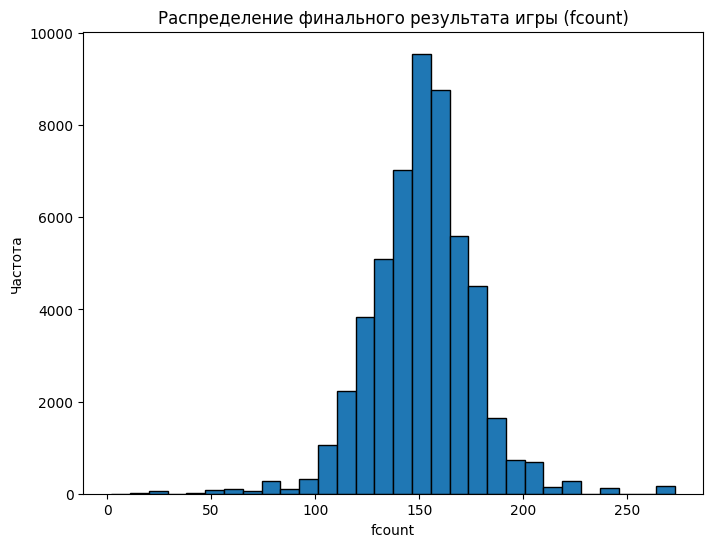

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df['fcount'], bins=30, edgecolor='k')
plt.title('Распределение финального результата игры (fcount)')
plt.xlabel('fcount')
plt.ylabel('Частота')
plt.show()


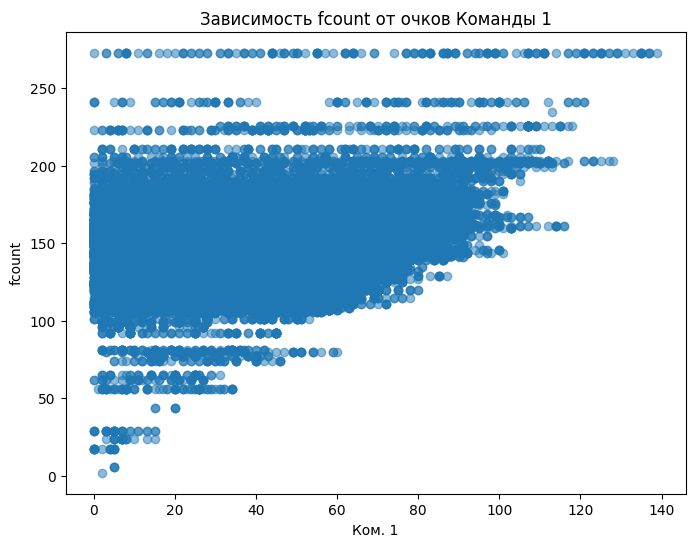

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['Ком. 1'], df['fcount'], alpha=0.5)
plt.title('Зависимость fcount от очков Команды 1')
plt.xlabel('Ком. 1')
plt.ylabel('fcount')
plt.show()


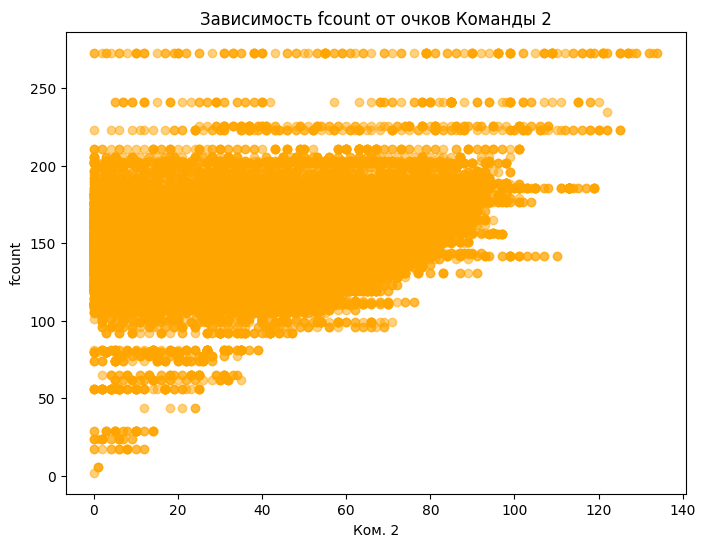

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['Ком. 2'], df['fcount'], alpha=0.5, color='orange')
plt.title('Зависимость fcount от очков Команды 2')
plt.xlabel('Ком. 2')
plt.ylabel('fcount')
plt.show()


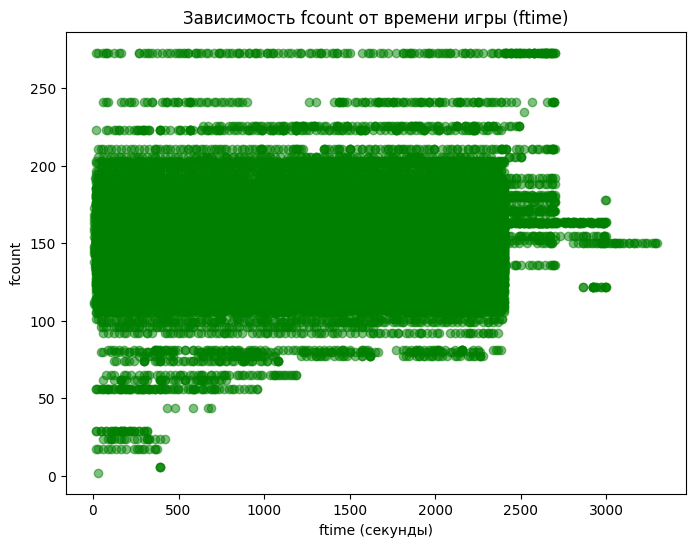

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['ftime'], df['fcount'], alpha=0.5, color='green')
plt.title('Зависимость fcount от времени игры (ftime)')
plt.xlabel('ftime (секунды)')
plt.ylabel('fcount')
plt.show()


## Подготовка данных

In [ ]:
X = df[['Ком. 1', 'Ком. 2', 'ftime']].astype(int)
y = df['fcount'].astype(int)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


## Обучение и оценка различных моделей

### Линейная регрессия

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train_scaled, y_train)

y_pred_lr = lr_model.predict(x_test_scaled)


In [ ]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Линейная регрессия - MAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}")


Линейная регрессия - MAE: 12.00, MSE: 322.33, R2: 0.49


### Дерево решений

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

y_pred_dt = dt_model.predict(x_test)


In [ ]:
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Дерево решений - MAE: {mae_dt:.2f}, MSE: {mse_dt:.2f}, R2: {r2_dt:.2f}")


Дерево решений - MAE: 10.60, MSE: 358.87, R2: 0.43


### Случайное дерево решений

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)


In [ ]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Случайный лес - MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}")


Случайный лес - MAE: 9.88, MSE: 264.17, R2: 0.58


### Нейронная сеть

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(200, input_dim=3, activation='relu'))
nn_model.add(Dense(200, activation='relu'))
nn_model.add(Dense(1, activation='linear'))

nn_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

history = nn_model.fit(x_train_scaled, y_train,
                       validation_data=(x_test_scaled, y_test),
                       epochs=10,
                       batch_size=32,
                       callbacks=[early_stop],
                       verbose=1)


Epoch 1/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 46.5903 - mean_absolute_error: 46.5903 - val_loss: 11.7252 - val_mean_absolute_error: 11.7252
Epoch 2/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 11.7699 - mean_absolute_error: 11.7699 - val_loss: 11.6934 - val_mean_absolute_error: 11.6934
Epoch 3/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 11.6180 - mean_absolute_error: 11.6180 - val_loss: 11.9417 - val_mean_absolute_error: 11.9417
Epoch 4/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 11.5419 - mean_absolute_error: 11.5419 - val_loss: 11.8860 - val_mean_absolute_error: 11.8860
Epoch 5/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 11.5503 - mean_absolute_error: 11.5503 - val_loss: 11.8469 - val_mean_absolute_error: 11.8469
Epoch 6/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 11.6510 - mean_absolute_error: 11.6510 - val_loss: 12.0940 - val_mean_absolute_error: 12.0940
Epoch 7/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 11

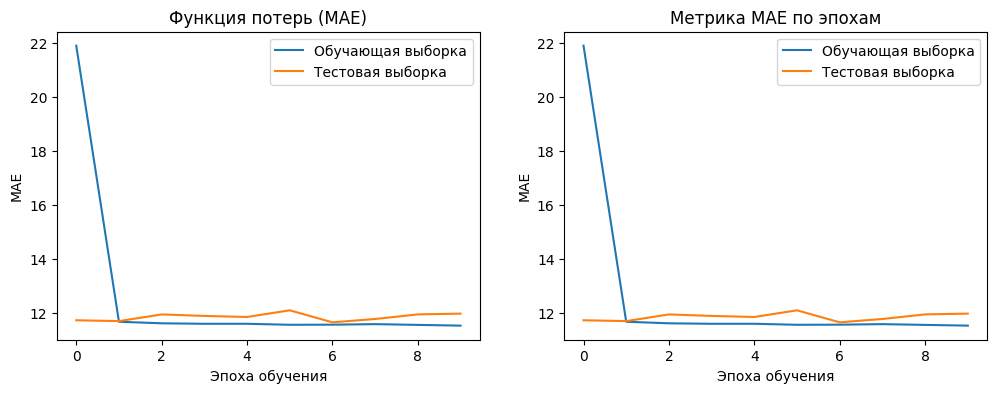

In [ ]:
plt.figure(figsize=(12,4))

# График функции потерь
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Обучающая выборка')
plt.plot(history.history['val_loss'], label='Тестовая выборка')
plt.title('Функция потерь (MAE)')
plt.xlabel('Эпоха обучения')
plt.ylabel('MAE')
plt.legend()

# График метрики MAE
plt.subplot(1,2,2)
plt.plot(history.history['mean_absolute_error'], label='Обучающая выборка')
plt.plot(history.history['val_mean_absolute_error'], label='Тестовая выборка')
plt.title('Метрика MAE по эпохам')
plt.xlabel('Эпоха обучения')
plt.ylabel('MAE')
plt.legend()

plt.show()


In [ ]:
y_pred_nn = nn_model.predict(x_test_scaled)

mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Нейронная сеть - MAE: {mae_nn:.2f}, MSE: {mse_nn:.2f}, R2: {r2_nn:.2f}")


328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Нейронная сеть - MAE: 11.97, MSE: 323.15, R2: 0.49


## Сравнение моделей

In [ ]:
results = pd.DataFrame({
    'Модель': ['Линейная регрессия', 'Дерево решений', 'Случайный лес', 'Нейронная сеть'],
    'MAE': [mae_lr, mae_dt, mae_rf, mae_nn],
    'MSE': [mse_lr, mse_dt, mse_rf, mse_nn],
    'R2': [r2_lr, r2_dt, r2_rf, r2_nn]
})

print(results)


               Модель        MAE         MSE        R2
0  Линейная регрессия  11.998400  322.330360  0.492345
1      Дерево решений  10.600268  358.870994  0.434795
2       Случайный лес   9.884775  264.173525  0.583939
3      Нейронная сеть  11.971733  323.154846  0.491046


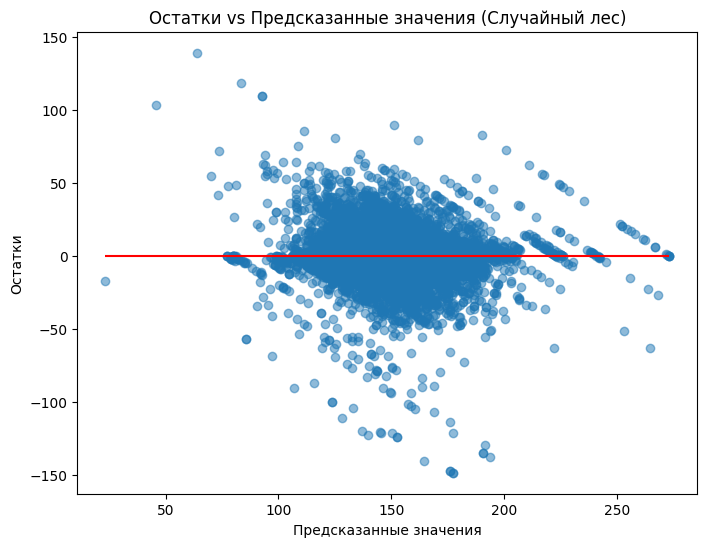

In [ ]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(8,6))
plt.scatter(y_pred_rf, residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(y_pred_rf), xmax=max(y_pred_rf), colors='red')
plt.title('Остатки vs Предсказанные значения (Случайный лес)')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.show()


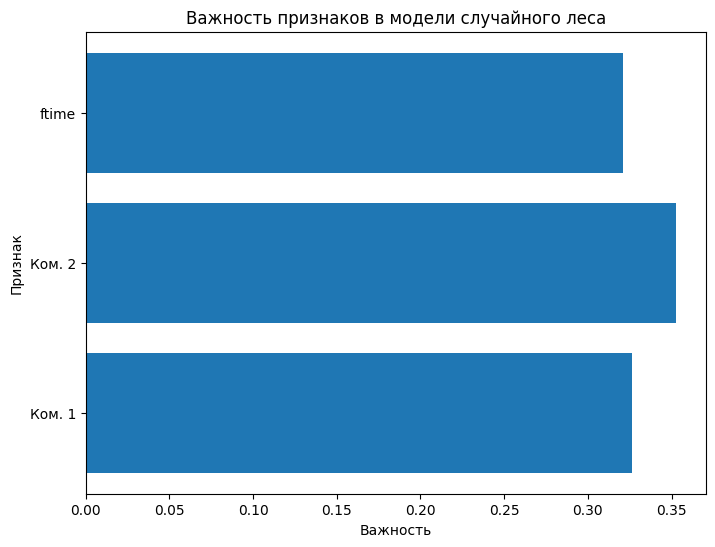

In [ ]:
importances = rf_model.feature_importances_
feature_names = ['Ком. 1', 'Ком. 2', 'ftime']

plt.figure(figsize=(8,6))
plt.barh(feature_names, importances)
plt.title('Важность признаков в модели случайного леса')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()
